# Linear Regression

**Regression**: Regression is a statistical technique that relates a dependent variable to one or more independent variables, in other words, analyze the relationship between a dependent variable (target variable) and one or more independent variables (predictor variables).
The objective is to determine the most suitable function that characterizes the connection between these variables.

In ML, it is a supervised machine learning technique, used to predict the value of the dependent variable for new, unseen data. It models the relationship between the input features and the target variable, allowing for the estimation or prediction of numerical values.

-   -   -   -   -   -   -   -     -   -   -   -   -   - -   -   -   -   -   -  

The _best fit_ line is the _average_ that minimizes the error.

The best fit, calulated average, line is taken in case of labels only.

Bringing features into the picture we can create a linear equation for that and draw a line(which may or may not be a straight one).

In [1]:
import numpy as np                       # pip install numpy
import matplotlib.pyplot as plt                 # pip install matplotlib
from sklearn import datasets, linear_model           # pip install scikit-learn
from sklearn.metrics import mean_squared_error

The graph

    Y = MX + B 

where, **B** is the intercept  (0, 5.5) or (0, 4)

and    **M** is the slope of the line [tan x], the angle x at (2, 4), & straight line(0, 4)


it can also be written as,  

    Y = Wo + W1 * X1

here, X1 is _Independent variable_ and Y [f(X)] is a _Dependent Variable_.

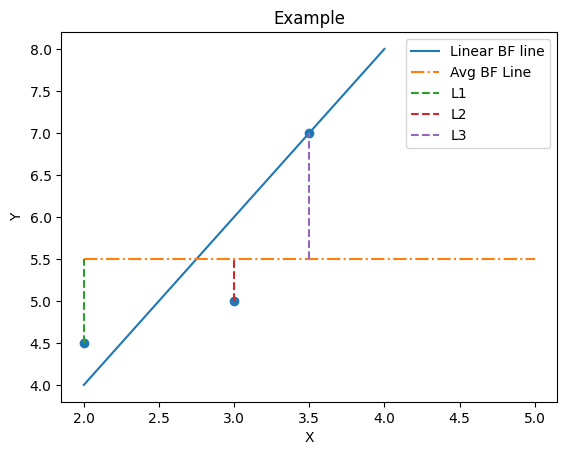

In [2]:
plt.plot([2, 3, 4], [4, 6, 8], label = "Linear BF line")
plt.scatter([2, 3, 3.5], [4.5, 5, 7])
plt.plot([ 2, 3, 4, 5 ], [5.5, 5.5, 5.5, 5.5] ,label="Avg BF Line", linestyle='dashdot')
plt.plot([2, 2], [4.5, 5.5], label="L1", linestyle = 'dashed')
plt.plot([3, 3], [5, 5.5], label="L2", linestyle = 'dashed')
plt.plot([3.5, 3.5], [5.5, 7], label="L3", linestyle = 'dashed')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example")
plt.show()

Sum of Squared Error : 

    SSE = (L1*L1) + (L2*L2) + (L3*L3)
    

* The BEST FIT line is the line at which the Sum of Squared Error (SSE) is MINimum !

* The LOSS FUNCTION is  a part of the ML model, a function that tells about the loss in the solution and track improvement. 

* The SSE is a kind of Loss Function.

Features  -->  Model (predictio function)  -->  Compute Loss  (Update Parameters from here to Model)  <--  Labels


-------------------------------------------------------------------------------

Now rewriting the equation for multiple variables [labels (dependent) & features (independent)],

Two var,
         
    f(X1, X2) = Wo + (W1 * X1) + (W2 * X2)  

N var,

    f(X1, X2,..., Xn) = Wo + (W1 * X1) + (W2 * X2) + ... + (Wn * Xn) 

The Training in LR is finding these independent variables, i.e, Wo, W1,.., Wn.

The process of finding out these independent variables is called as **Model Training**.

The model is provided with the data and it is learns. So that when provided with the values of Independent Variables it can predict the Dependent Variables.



-------------------------------------------------------------------------------

### Writing the code

We can generally obtain the dataset from [UCI ML repository](https://archive.ics.uci.edu/)

##### Loading Dataset

In [3]:
diabetes = datasets.load_diabetes()

##### Dataset Description

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [6]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
diab_x = diabetes.data[:, np.newaxis, 2]
diab_x

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [8]:
# slicing the data

train_diab_x = diab_x[:-30]                # last 20 values
test_diab_x = diab_x[-20:]                 # starting 20 values

train_diab_y = diabetes.target[:-30]
test_diab_y = diabetes.target[-20:]

##### Creating Model

**Regression Model**:  A regression model is able to show whether changes observed in the dependent variable are associated with changes in one or more of the independent variables.

Linear Model. The simplest of model.

In [9]:
model = linear_model.LinearRegression()

##### Train the Model

In [10]:
# Fitting data

model.fit(train_diab_x, train_diab_y)

LinearRegression()

##### Predictions

In [11]:
predict_diab_y = model.predict(test_diab_x)

##### Calculating the Mean Squared Value

MSV = ∑ (predicted-actual)**2 / no of values

**Mean Squared Value** is actually the average of SSE [Sum of Squared Error]

MSV = SSE / no of values

In [12]:
print("Mean Squared Error is : ", mean_squared_error(test_diab_y, predict_diab_y))

Mean Squared Error is :  2561.320427728385


##### Calculating Weights and Intercept

In [13]:
print("Weights : ", model.coef_)
print("Intercept : ", model.intercept_)

Weights :  [941.43097333]
Intercept :  153.39713623331644


##### Plotting

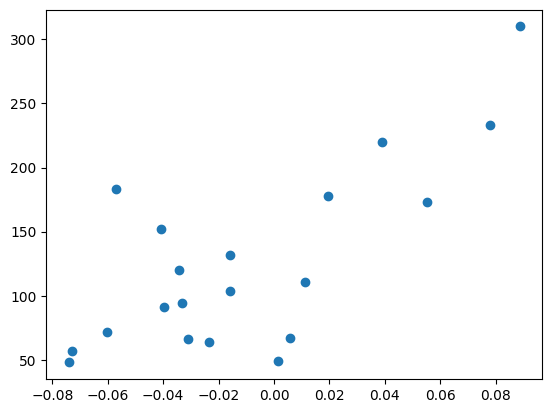

In [14]:
plt.scatter(test_diab_x, test_diab_y)
plt.show()

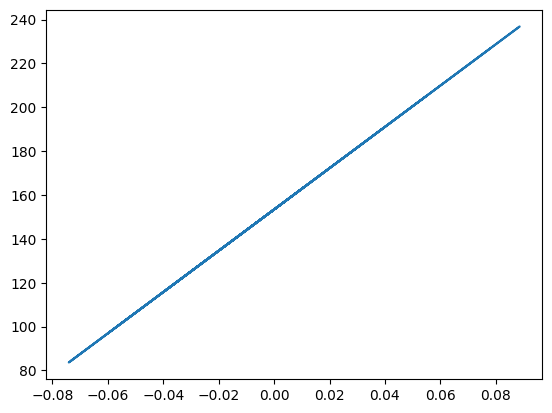

In [15]:
plt.plot(test_diab_x, predict_diab_y)
plt.show()

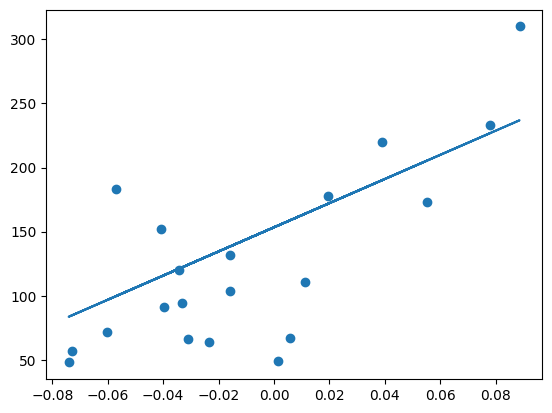

In [16]:
plt.scatter(test_diab_x, test_diab_y)
plt.plot(test_diab_x, predict_diab_y)
plt.show()

This was a demo using _one feature_.



-------------------------------------------------------------------------------

Now using _multiple features_.

In [17]:
diab_X = diabetes.data
diab_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [18]:
train_diab_X = diab_X[:-30]
test_diab_X = diab_X[-20:]

train_diab_Y = diabetes.target[:-30]
test_diab_Y = diabetes.target[-20:]

In [19]:
Model = linear_model.LinearRegression()

Model.fit(train_diab_X, train_diab_Y)

LinearRegression()

In [20]:
predict_diab_Y = Model.predict(test_diab_X)

In [21]:
print("Mean Squared Error is : ", mean_squared_error(test_diab_Y, predict_diab_Y))
print("Weights : ", Model.coef_)
print("Intercept : ", Model.intercept_)

Mean Squared Error is :  2004.2629212944946
Weights :  [  -1.16678648 -237.18123633  518.31283524  309.04204042 -763.10835067
  458.88378916   80.61107395  174.31796962  721.48087773   79.1952801 ]
Intercept :  153.05824267739402


-------------------------------------------------------------------------------

In [22]:
Diab_x = np.array([[1], [2], [3]])

Diab_x_train = Diab_x 
Diab_x_test = Diab_x 

Diab_y_train = np.array([3, 2, 4])
Diab_y_test = np.array([3, 2, 4])


In [23]:
model_b = linear_model.LinearRegression()
model_b.fit(Diab_x_train, Diab_y_train)


LinearRegression()

In [24]:
Diab_y_predict = model_b.predict(Diab_x_test)

print("Mean Squared Error is : ", mean_squared_error(test_diab_Y, predict_diab_Y))
print("Weights : ", model_b.coef_)
print("Intercept : ", model_b.intercept_)

Mean Squared Error is :  2004.2629212944946
Weights :  [0.5]
Intercept :  2.0


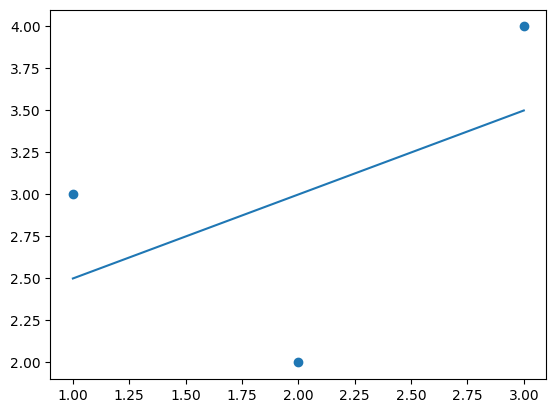

In [25]:
plt.scatter(Diab_x_test, Diab_y_test)
plt.plot(Diab_x_test, Diab_y_predict)
plt.show()

-------------------------------------------------------------------------------